In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time

In [28]:
data = pd.read_csv('BreastCancer_Diagnosis.csv')

In [29]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [30]:
data = data.replace(to_replace = "B", value =0)

In [31]:
data = data.replace(to_replace = "M", value =1)

In [32]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Number of Benign:  357
Number of Malignant :  212


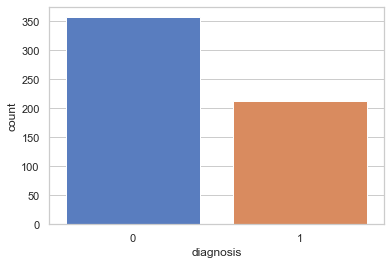

In [33]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [34]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

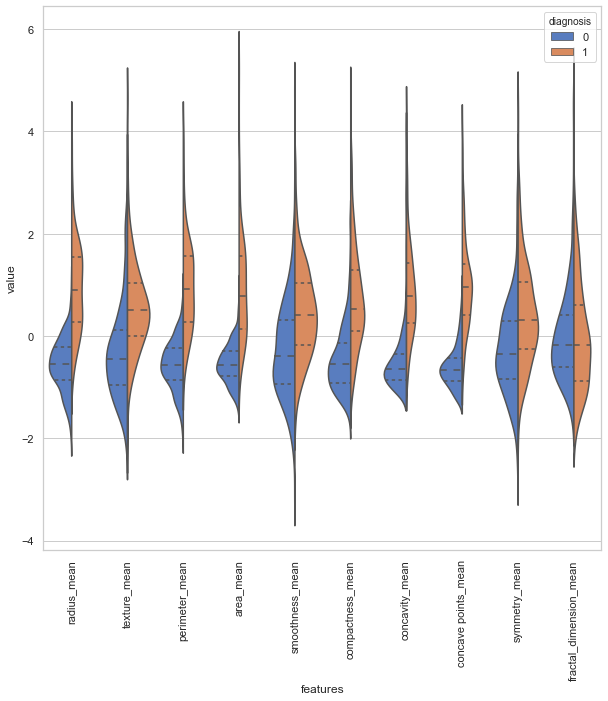

In [35]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

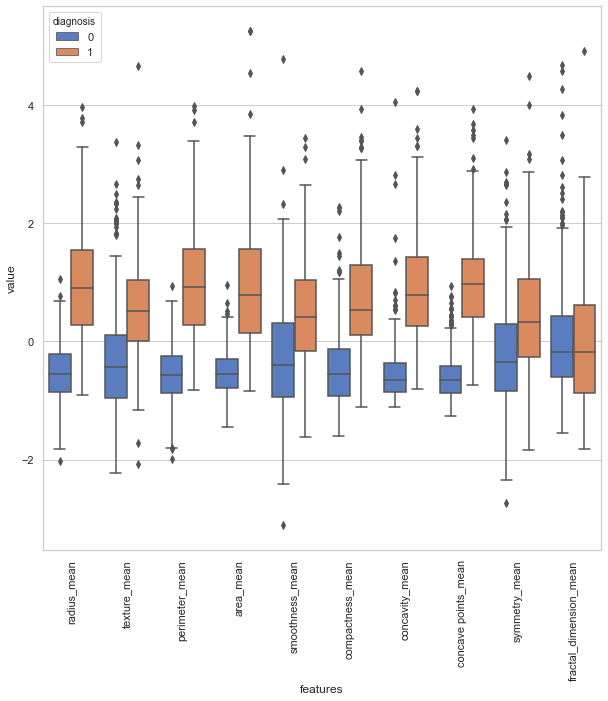

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

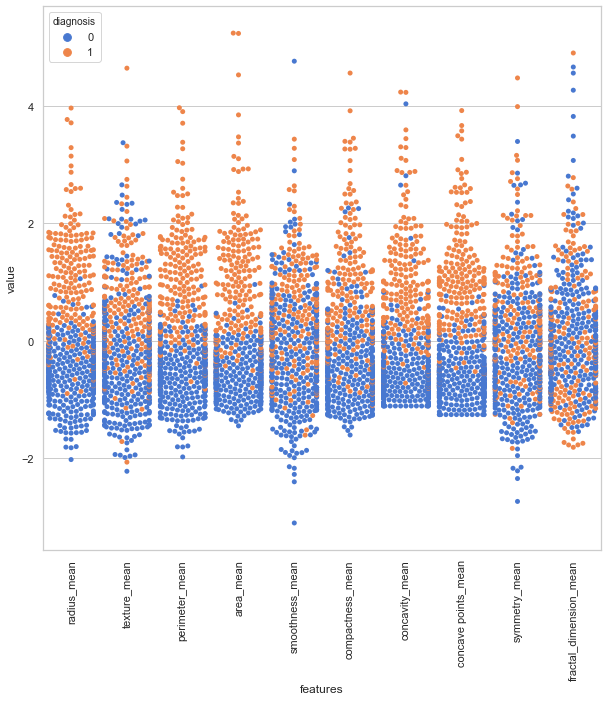

In [37]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

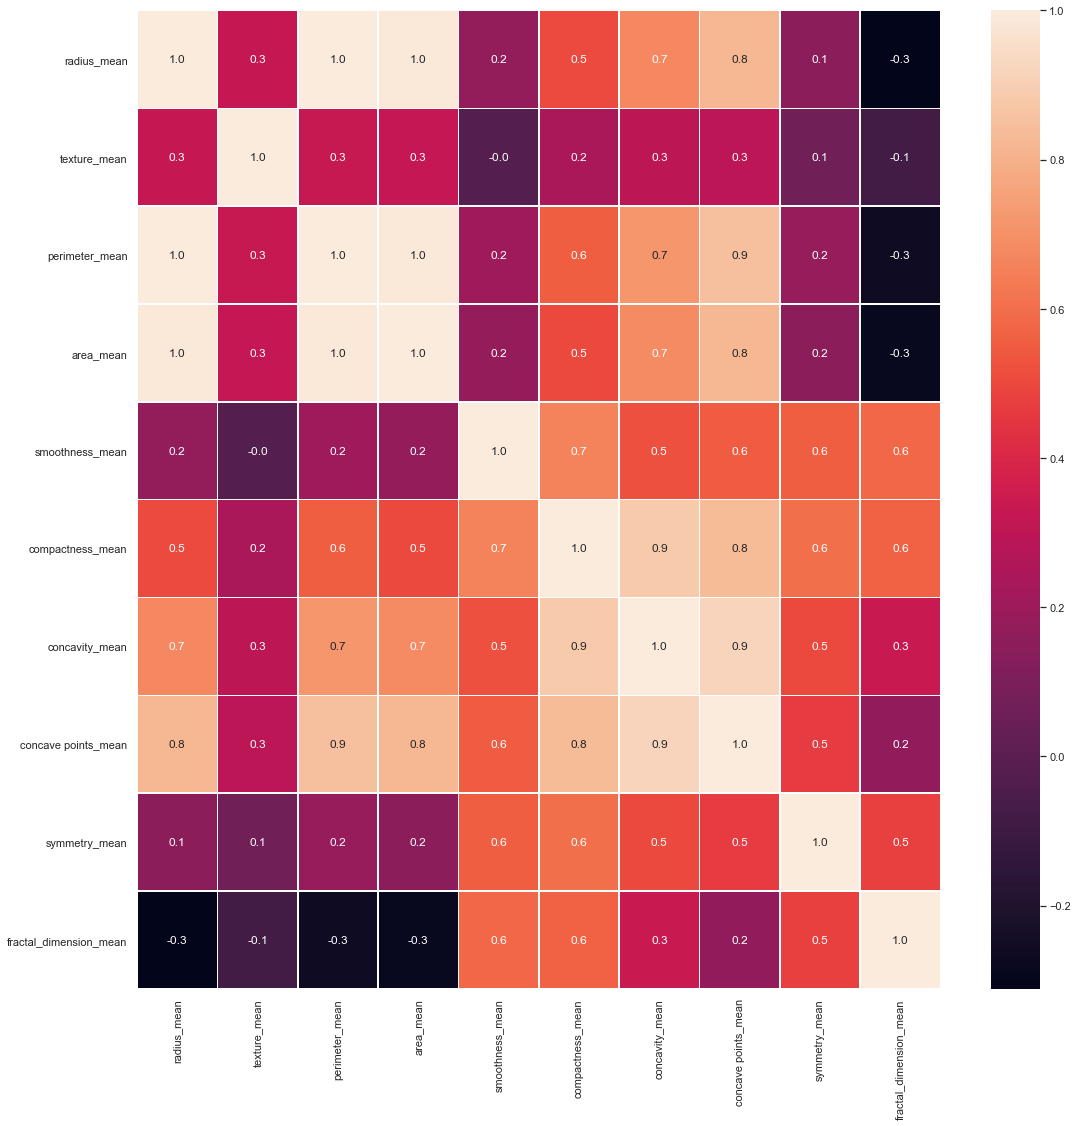

In [38]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [40]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883


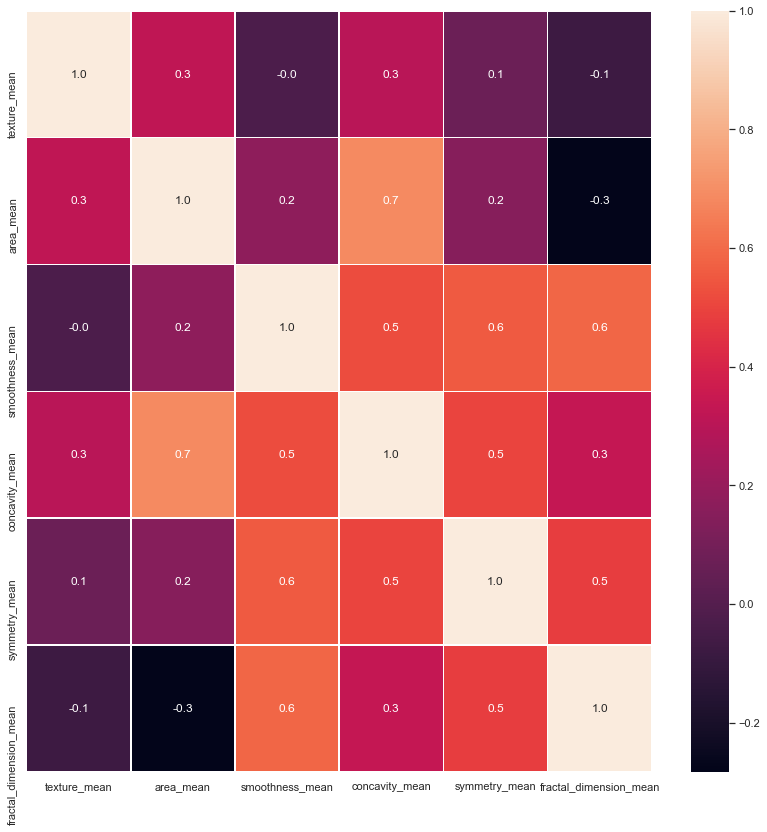

In [41]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [42]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

Accuracy is:  0.9766081871345029


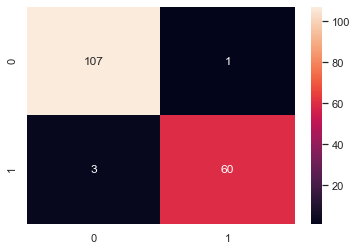

In [43]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [44]:
from sklearn.metrics import precision_recall_fscore_support
def evaluation_matrix(y_test, y_pred):
    #y_pred = y_pred.astype(int)
    #y_test = y_test.astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f_score 
accuracy, precision, recall, f_score = evaluation_matrix(y_test,clf_rf.predict(x_test))

print('accuracy= ', accuracy)
print('precision= ', precision)
print('recall= ', recall)
print('f_score= ', f_score)

accuracy=  0.9766081871345029
precision=  0.978166915052161
recall=  0.9715608465608465
f_score=  0.9746966558153299


In [45]:
# Recursive feature elimination (RFE) with random forest
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=, step=1)
rfe = rfe.fit(x_train, y_train)

In [46]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean'],
      dtype='object')


In [47]:
# Recursive feature elimination with cross validation and random forest classification
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 4
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean'], dtype='object')


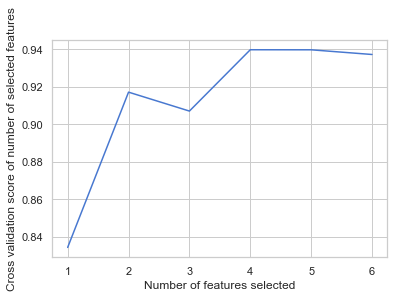

In [48]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 3 (0.382656)
2. feature 1 (0.320043)
3. feature 0 (0.106661)
4. feature 2 (0.079271)
5. feature 4 (0.056326)
6. feature 5 (0.055042)


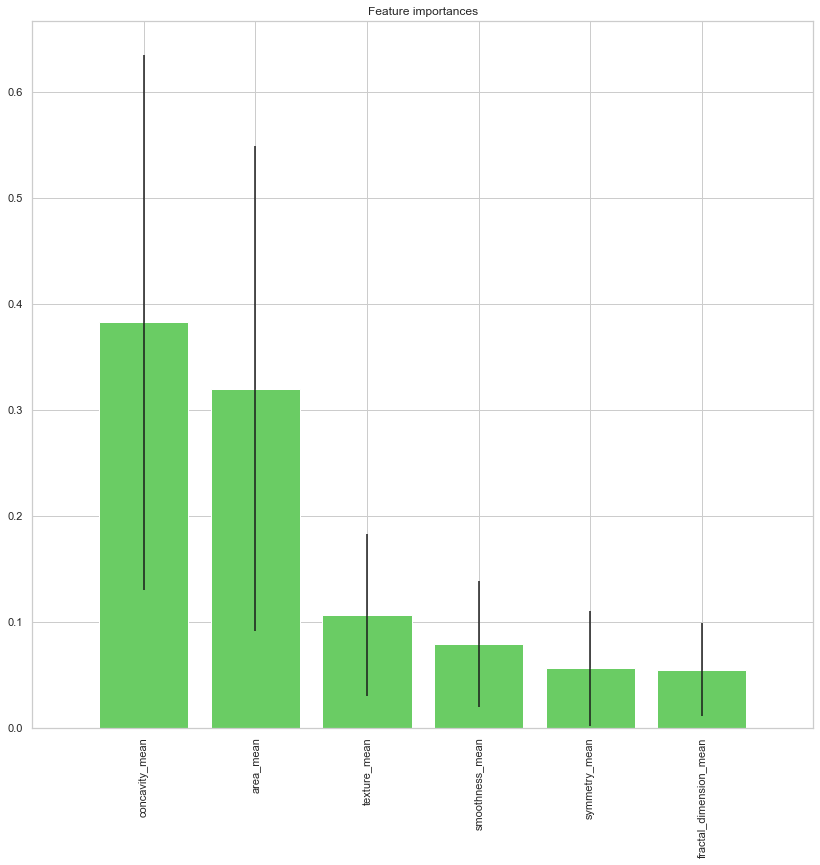

In [49]:
# Tree based feature selection and random forest classification
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Text(0, 0.5, 'explained_variance_ratio_')

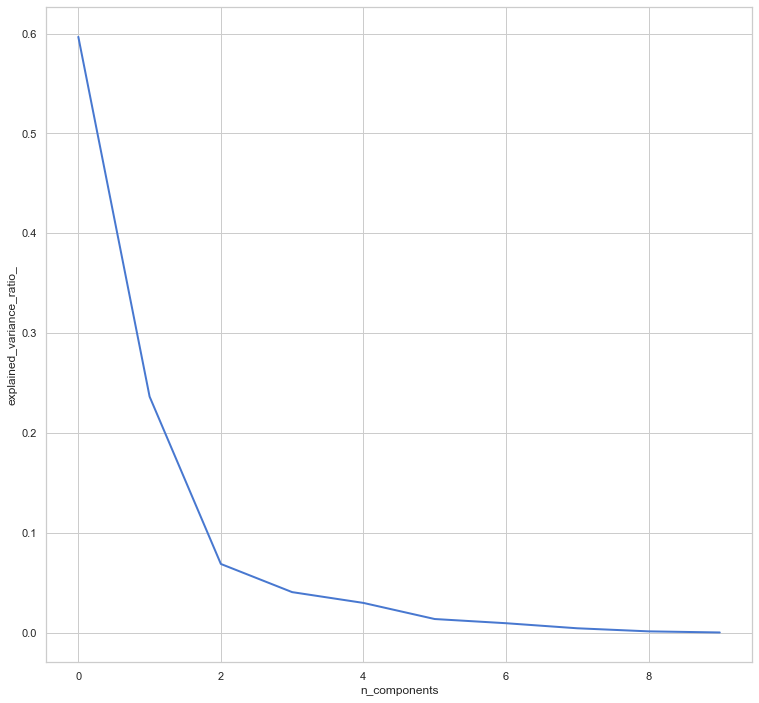

In [50]:
# split data train 70 % and test 30 %
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train_n-x_train_n.mean())/(x_train_n.max()-x_train_n.min())
x_test_N = (x_test_n-x_test_n.mean())/(x_test_n.max()-x_test_n.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [51]:
from scipy.stats import chi2_contingency
chi2_contingency(x)

(5415.123046985567,
 0.0016037595370354109,
 5112,
 array([[2.08661428e+01, 2.84909923e+01, 1.35839128e+02, ...,
         7.22540387e-02, 2.67577776e-01, 9.27526606e-02],
        [2.70982030e+01, 3.70003550e+01, 1.76410000e+02, ...,
         9.38340460e-02, 3.47494836e-01, 1.20454961e-01],
        [2.48729450e+01, 3.39619493e+01, 1.61923513e+02, ...,
         8.61285550e-02, 3.18959156e-01, 1.10563406e-01],
        ...,
        [1.83023954e+01, 2.49904072e+01, 1.19149066e+02, ...,
         6.33764465e-02, 2.34701463e-01, 8.13564769e-02],
        [2.63462937e+01, 3.59736852e+01, 1.71515051e+02, ...,
         9.12303795e-02, 3.37852700e-01, 1.17112629e-01],
        [4.73167557e+00, 6.46071167e+00, 3.08033299e+01, ...,
         1.63845648e-02, 6.06768216e-02, 2.10329001e-02]]))

In [53]:
# accuracy, precision, recall, f_score = evaluation_matrix(y_test,clf_rf.predict(x_test))
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, clf_rf.predict(x_test))
print('MSE - ',mse)

MSE -  0.023391812865497075


In [55]:
rmse = mean_squared_error(y_test, clf_rf.predict(x_test),squared=False)
print('RMSE - ',rmse)

RMSE -  0.1529438225803745


In [56]:
x_test.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
204,18.60,481.9,0.09965,0.08005,0.1925,0.06373
70,21.31,1130.0,0.09009,0.10800,0.1582,0.05461
131,19.48,748.9,0.10920,0.14660,0.1931,0.05796
431,17.68,467.8,0.10540,0.07741,0.1811,0.07102
540,14.44,402.9,0.09984,0.06737,0.1818,0.06782


In [57]:
y_test.head()

204    0
70     1
131    1
431    0
540    0
Name: diagnosis, dtype: int64